<h1>Decision Tree</h1>

In [82]:
#importing

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus #decision tree model creation, graph of decision tree creation
from IPython.display import Image #visualization

In [4]:
dataset = pd.read_csv('golf.csv', index_col=0)

In [5]:
dataset

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [56]:
#one hot encoding
x= pd.get_dummies(dataset[['Outlook', 'Temperature', 'Humidity', 'Windy']])

#pd.get_dummies converts categorical variable into dummy/indicator variable and for vice versa use from_dummies

In [57]:
x

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,1,0
4,0,0,1,0,1,0,0,0,1
5,1,0,1,0,1,0,0,0,1
6,1,1,0,0,1,0,0,0,1
7,0,0,0,1,0,0,1,1,0
8,0,0,0,1,1,0,0,0,1
9,0,0,1,0,0,0,1,0,1


In [44]:
#For converting data of Windy (True or False)to Dummy Varible when it is not converted
# dataset_new1 = dataset.copy()                                      # Create copy of DataFrame
# dataset_new1['x1'] = dataset_new1['x1'].astype(int)                # Transform boolean to integer
# print(dataset_new1)                                             # Print updated pandas DataFrame

#Or

#x= dataset['Windy'].astype(int) 

In [58]:
y = dataset["Play"]

In [59]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [64]:
#x.loc[:, 'Windy'].replace([0, 1], [True,False], inplace=True)

In [65]:
#x

In [85]:
import sklearn

In [90]:
#decision tree model
model=sklearn.tree.DecisionTreeClassifier(
    criterion='entropy', random_state=100
)
#The entropy value is always 0-1

In [91]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

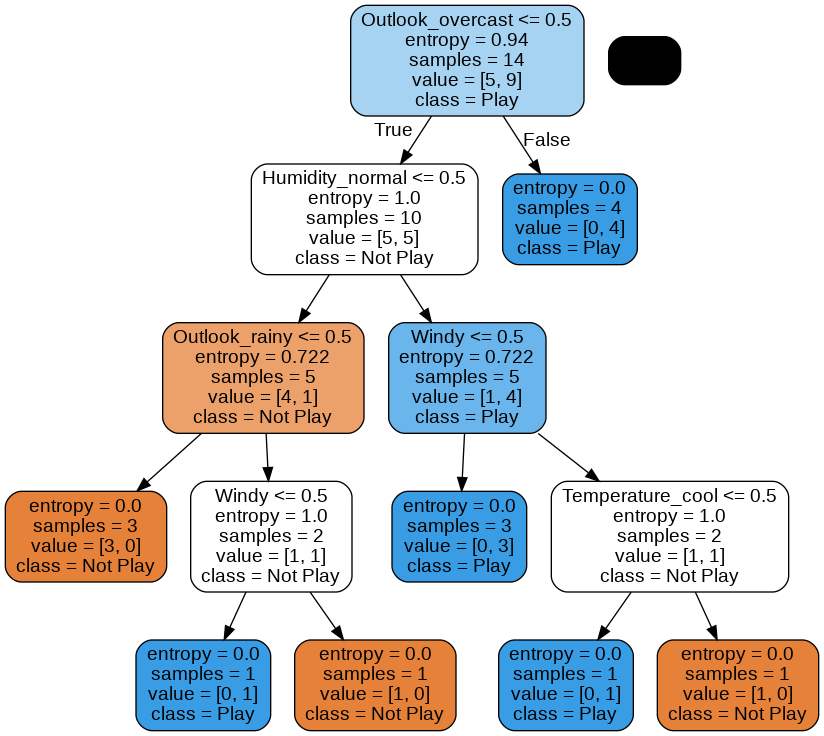

In [ ]:
data_plot = tree.export_graphviz(model, out_file=None, feature_names= list(x.columns.values), class_names=['Not Play', 'Play'],
                                 rounded= True, filled=True)
graph = pydotplus.graph_from_dot_data(data_plot)
Image(graph.create_png())